# Garbage Classification

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.compat.v1 import ConfigProto

from tensorflow.compat.v1 import InteractiveSession



config = ConfigProto()

config.gpu_options.allow_growth = True

session = InteractiveSession(config=config)

In [3]:
tf.__version__

'2.4.1'

In [3]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [4]:
import os
print(os.listdir('./Garbage classification/Garbage classification'))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'test', 'trash']


In [5]:
data_path = './Garbage classification/Garbage classification'

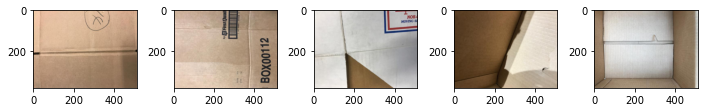

In [6]:
plot_imgs(data_path+'/cardboard')

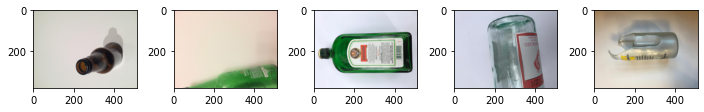

In [7]:
plot_imgs(data_path+'/glass')

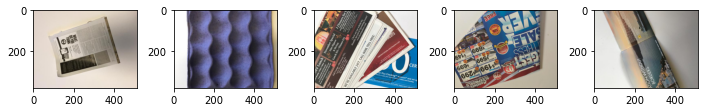

In [8]:
plot_imgs(data_path+'/paper')

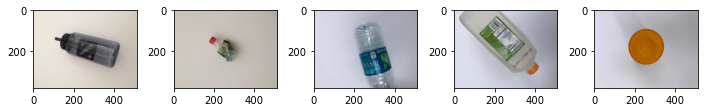

In [9]:
plot_imgs(data_path+'/plastic')

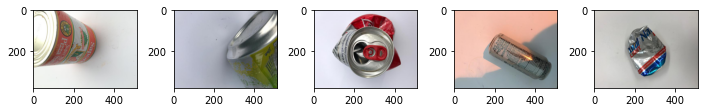

In [10]:
plot_imgs(data_path+'/metal')

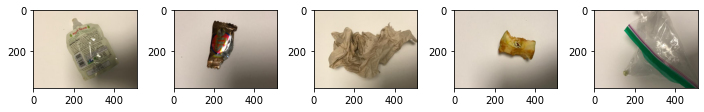

In [11]:
plot_imgs(data_path+'/trash')

## Data Generator

In [21]:
batch_size = 32

In [22]:
train=ImageDataGenerator(
    horizontal_flip=True, 
    vertical_flip=True,
    validation_split=0.1,
    rescale=1./255,
    shear_range = 0.1,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator=train.flow_from_directory(data_path,target_size=(512,384),batch_size=batch_size,class_mode='categorical',subset='training')

test_generator=test.flow_from_directory(data_path,target_size=(512,384),batch_size=batch_size,class_mode='categorical',subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [23]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


## Build Model

In [24]:
num_classes = 6

In [29]:
model = Sequential()
   
model.add(Conv2D(32,(3,3), padding='same', input_shape=(512,384,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.1))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.1))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.1))
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes,activation='softmax')) # 다중분류

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 512, 384, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 256, 192, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256, 192, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 256, 192, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 128, 96, 64)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 96, 64)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 96, 64)      

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [35]:
num_epochs = 70
step_size_train=train_generator.n//train_generator.batch_size
step_size_test =test_generator.n//test_generator.batch_size

In [36]:
history = model.fit_generator(train_generator, epochs=num_epochs, steps_per_epoch=step_size_train,validation_data=test_generator,
                    validation_steps=step_size_test)

Epoch 1/70
71/71 [==============================] - 57s 802ms/step - loss: 1.5708 - accuracy: 0.3316 - val_loss: 1.5536 - val_accuracy: 0.3304
Epoch 2/70
71/71 [==============================] - 52s 738ms/step - loss: 1.4996 - accuracy: 0.3783 - val_loss: 1.4821 - val_accuracy: 0.3839
Epoch 3/70
71/71 [==============================] - 52s 733ms/step - loss: 1.4514 - accuracy: 0.3917 - val_loss: 1.4007 - val_accuracy: 0.3571
Epoch 4/70
71/71 [==============================] - 52s 734ms/step - loss: 1.4081 - accuracy: 0.4135 - val_loss: 1.4385 - val_accuracy: 0.4152
Epoch 5/70
71/71 [==============================] - 52s 734ms/step - loss: 1.3502 - accuracy: 0.4389 - val_loss: 1.3581 - val_accuracy: 0.4286
Epoch 6/70
71/71 [==============================] - 52s 733ms/step - loss: 1.3526 - accuracy: 0.4439 - val_loss: 1.3028 - val_accuracy: 0.4375
Epoch 7/70
71/71 [==============================] - 52s 734ms/step - loss: 1.2946 - accuracy: 0.4742 - val_loss: 1.4015 - val_accuracy: 0.4196

71/71 [==============================] - 59s 819ms/step - loss: 0.7166 - accuracy: 0.7357 - val_loss: 0.8850 - val_accuracy: 0.6964
Epoch 59/70
71/71 [==============================] - 58s 810ms/step - loss: 0.7235 - accuracy: 0.7317 - val_loss: 0.8147 - val_accuracy: 0.7098
Epoch 60/70
71/71 [==============================] - 58s 807ms/step - loss: 0.6836 - accuracy: 0.7455 - val_loss: 0.7922 - val_accuracy: 0.7366
Epoch 61/70
71/71 [==============================] - 58s 815ms/step - loss: 0.6746 - accuracy: 0.7540 - val_loss: 0.7993 - val_accuracy: 0.7545
Epoch 62/70
71/71 [==============================] - 59s 823ms/step - loss: 0.6690 - accuracy: 0.7745 - val_loss: 0.8021 - val_accuracy: 0.7455
Epoch 63/70
71/71 [==============================] - 58s 810ms/step - loss: 0.7133 - accuracy: 0.7433 - val_loss: 0.7833 - val_accuracy: 0.7366
Epoch 64/70
71/71 [==============================] - 59s 823ms/step - loss: 0.7354 - accuracy: 0.7264 - val_loss: 0.8986 - val_accuracy: 0.6830
Epoc

## Model save

In [37]:
model.save('garbage_model.h5')

In [129]:
Load_model = keras.models.load_model('garbage_model.h5')

## Evaluate Model

In [40]:
# Evaluate Model
score = Load_model.evaluate_generator(test_generator, steps=step_size_test)
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.8631477355957031, 0.7723214030265808]


## Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


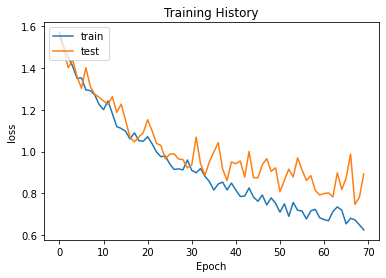

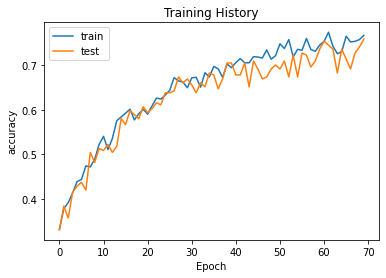

In [41]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

In [117]:
image_path = "./Garbage classification/carmea"

In [118]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
testGen = train.flow_from_directory(
    os.path.join(image_path),
    target_size=(512,384),
)

Found 5 images belonging to 1 classes.


In [119]:
predictions = Load_model.predict(testGen)

In [122]:
import numpy as np
from tensorflow.keras.preprocessing.image import array_to_img

cls_index = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

count = 4
print(predictions[count])
print('예측 : ', cls_index[np.argmax(predictions[count])], sep="")

[0.4793234  0.00178873 0.16931076 0.2649236  0.00567491 0.07897858]
예측 : cardboard


예측: plastic
정답: plastic


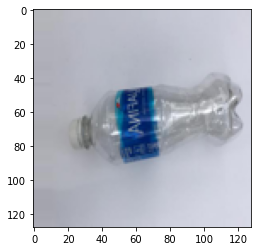

In [86]:
cls_index = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 512, 384, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))